In [120]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.rcParams['figure.figsize'] = (15, 5)

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("datosCabaYGBA.csv", low_memory = False)

In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
def filtrarCapitalYGBA(serie):
    deseados = ["Capital Federal"]
    booleans = []
    for item in serie:
        if item.split("|")[2] in deseados:
            booleans.append(True)
        else:
            booleans.append(False)
    return booleans

In [5]:
df = df[filtrarCapitalYGBA(df['place_with_parent_names'])]

# Como se comporta el precio de las propiedades de los barrios mas caros de CABA en relacion a si tienen cochera o no?

In [36]:
masCaros = ["Recoleta","Palermo","Belgrano","Nuñez","Colegiales"]
masBaratos = ["Boca","Constitución","Parque Avellaneda","Floresta"]

In [37]:
df = df.dropna(subset=['price_aprox_usd'])
df = df[df["price_aprox_usd"] > 0]

In [62]:
#Tupla barrio:(precio usd promedio con cochera, precio usd promedio sin cochera, cantidad con cochera, cantidad sin cochera)
results={}
for barrio in masCaros:
    df_barrio = df[df["place_name"] == barrio]
    descContieneCochera = df_barrio.description.str.contains("cochera").fillna(False)
    titContieneCochera = df_barrio.title.str.contains("cochera").fillna(False)
    propsConCochera = df_barrio[ descContieneCochera | titContieneCochera]
    propsSinCochera = df_barrio[~titContieneCochera & ~descContieneCochera]
    promedioPrecioConCochera = propsConCochera["price_aprox_usd"].mean()
    promedioPrecioSinCochera = propsSinCochera["price_aprox_usd"].mean()
    results[barrio] = (promedioPrecioConCochera, promedioPrecioSinCochera)

In [74]:
nombres = []
promediosConCochera = []
promediosSinCochera = []
for k in results:
    nombres.append(k)
    promediosConCochera.append(int(results[k][0]))
    promediosSinCochera.append(int(results[k][1]))

In [77]:
datos = {"nombres":nombres,"promConCochera":promediosConCochera,"promediosSinCochera":promediosSinCochera}

In [85]:
dfres.columns

Index([u'nombres', u'promConCochera', u'promediosSinCochera'], dtype='object')

In [81]:
dfres = pd.DataFrame(datos)

In [114]:
dfres.head(10)

,nombres,promConCochera,promediosSinCochera
0,Nuñez,428549,222258
1,Palermo,434614,265277
2,Colegiales,251436,171713
3,Recoleta,614550,348612
4,Belgrano,482300,273290


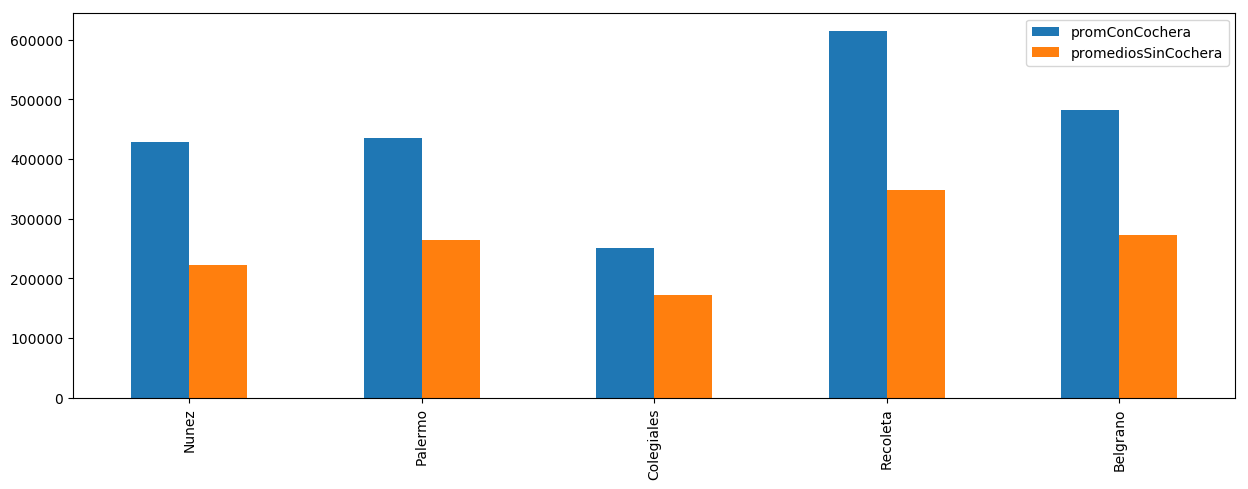

In [123]:
ax = dfres.plot(kind="bar")
ax.set_xticklabels(["Nunez","Palermo","Colegiales","Recoleta","Belgrano"])